In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial =  pd.read_csv('data/clinicaltrial_data.csv')
mouse_drugs = pd.read_csv('data/mouse_drug_data.csv')

# Combine the data into a single dataset
clinical_mouse = pd.merge(clinical_trial, mouse_drugs, on='Mouse ID')

# Display the data table for preview
clinical_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = clinical_mouse.groupby(['Drug', 'Timepoint']).mean().drop('Metastatic Sites', axis=1)

# Convert to DataFrame
cap_mean =  tumor_mean.loc['Capomulin']
cef_mean =  tumor_mean.loc['Ceftamin']
inf_mean =  tumor_mean.loc['Infubinol']
ram_mean =  tumor_mean.loc['Ramicane']
ste_mean =  tumor_mean.loc['Stelasyn']
zon_mean =  tumor_mean.loc['Zoniferol']
pla_mean =  tumor_mean.loc['Placebo']
naf_mean =  tumor_mean.loc['Naftisol']
pro_mean =  tumor_mean.loc['Propriva']
ket_mean =  tumor_mean.loc['Ketapril']

# Preview DataFrame
tumor_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = clinical_mouse.groupby(['Drug', 'Timepoint']).sem().drop(['Mouse ID','Metastatic Sites'], axis=1)

# Convert to DataFrame

# Preview DataFrame
tumor_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [148]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


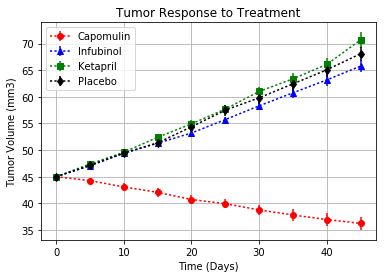

In [4]:
# Generate the Plot (with Error Bars)
time = np.arange(0, 50, 5)

#Generate error bars on a line graph, using plt.errorbar() and convering mean.loc and sem.loc objects to a list
plt.errorbar(time, tumor_mean.loc['Capomulin']['Tumor Volume (mm3)'].tolist(), 
             yerr=tumor_sem.loc['Capomulin']['Tumor Volume (mm3)'].tolist(), marker='o', linestyle = ':',color="red", label="Capomulin")
plt.errorbar(time, tumor_mean.loc['Infubinol']['Tumor Volume (mm3)'].tolist(), 
             yerr=tumor_sem.loc['Infubinol']['Tumor Volume (mm3)'].tolist(), marker='^', linestyle = ':',color="blue", label="Infubinol")
plt.errorbar(time, tumor_mean.loc['Ketapril']['Tumor Volume (mm3)'].tolist(), 
             yerr=tumor_sem.loc['Ketapril']['Tumor Volume (mm3)'].tolist(), marker='s', linestyle = ':',color="green", label="Ketapril")
plt.errorbar(time, tumor_mean.loc['Placebo']['Tumor Volume (mm3)'].tolist(), 
             yerr=tumor_sem.loc['Placebo']['Tumor Volume (mm3)'].tolist(), marker='d', linestyle = ':',color="black", label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc="upper left")

plt.grid()
plt.show()

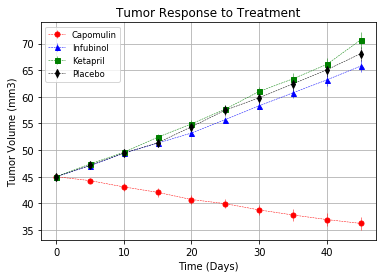

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = clinical_mouse.groupby(['Drug', 'Timepoint']).mean().drop('Tumor Volume (mm3)', axis=1)

# Convert to DataFrame

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = clinical_mouse.groupby(['Drug', 'Timepoint']).sem().drop(['Mouse ID','Tumor Volume (mm3)'], axis=1)

# Convert to DataFrame

# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


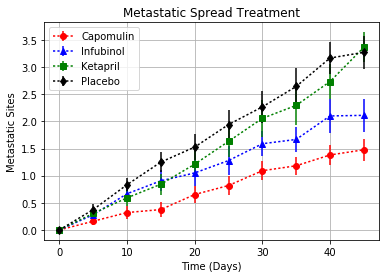

In [7]:
# Generate the Plot (with Error Bars)

time = np.arange(0, 50, 5)

#Generate error bars on a line graph, using plt.errorbar() and convering mean.loc and sem.loc objects to a list
plt.errorbar(time, meta_mean.loc['Capomulin']['Metastatic Sites'].tolist(), 
             yerr=meta_sem.loc['Capomulin']['Metastatic Sites'].tolist(), marker='o', linestyle = ':',color="red", label="Capomulin")
plt.errorbar(time, meta_mean.loc['Infubinol']['Metastatic Sites'].tolist(), 
             yerr=meta_sem.loc['Infubinol']['Metastatic Sites'].tolist(), marker='^', linestyle = ':',color="blue", label="Infubinol")
plt.errorbar(time, meta_mean.loc['Ketapril']['Metastatic Sites'].tolist(), 
             yerr=meta_sem.loc['Ketapril']['Metastatic Sites'].tolist(), marker='s', linestyle = ':',color="green", label="Ketapril")
plt.errorbar(time, meta_mean.loc['Placebo']['Metastatic Sites'].tolist(), 
             yerr=meta_sem.loc['Placebo']['Metastatic Sites'].tolist(), marker='d', linestyle = ':',color="black", label="Placebo")

plt.title("Metastatic Spread Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc="upper left")

plt.grid()
plt.show()


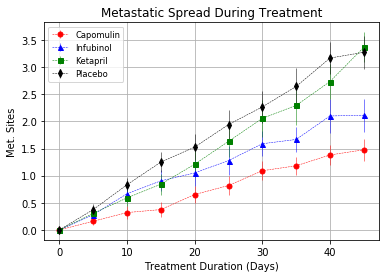

## Survival Rates

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = clinical_mouse.groupby(['Drug', 'Timepoint']).nunique().drop(['Tumor Volume (mm3)', 
                                                                            'Metastatic Sites', 'Drug', 'Timepoint'], axis=1)

# Convert to DataFrame
mouse_count = mouse_count.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


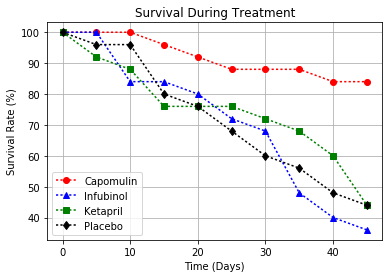

In [9]:
# Generate the Plot (Accounting for percentages)
time = np.arange(0, 50, 5)

#Generate error bars on a line graph, using plt.plot(), convert mouse count column to a list
plt.plot(time, 100*(mouse_count.loc['Capomulin']['Mouse Count'])/25, 
         marker='o', linestyle = ':',color="red", label="Capomulin")
plt.plot(time, 100*(mouse_count.loc['Infubinol']['Mouse Count'])/25, 
         marker='^', linestyle = ':',color="blue", label="Infubinol")
plt.plot(time, 100*(mouse_count.loc['Ketapril']['Mouse Count'])/25, 
         marker='s', linestyle = ':',color="green", label="Ketapril")
plt.plot(time, 100*(mouse_count.loc['Placebo']['Mouse Count'])/25, 
         marker='d', linestyle = ':',color="black", label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc="bottom left")

plt.grid()
plt.show()

# Save the Figure

# Show the Figure
plt.show()

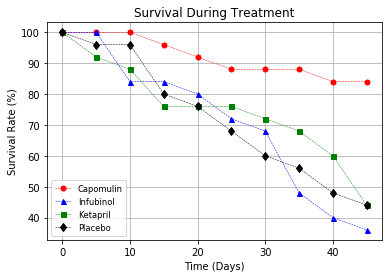

## Summary Bar Graph

In [10]:
# Calculate the percent changes for each drug
drug_list = clinical_mouse['Drug'].unique()
tumor_comps = list()
for x in drug_list:
    tumor_start = tumor_mean.loc[x]['Tumor Volume (mm3)'].values[0]
    tumor_end = tumor_mean.loc[x]['Tumor Volume (mm3)'].values[9]
    tumor_pct = int(100*((tumor_end-tumor_start)/tumor_start))
    drug_name = x.replace("'", " ")
    tumor_comps.append((drug_name,tumor_pct))
# Display the data to confirm
tumor_comps

[('Capomulin', -19),
 ('Ketapril', 57),
 ('Naftisol', 53),
 ('Infubinol', 46),
 ('Stelasyn', 52),
 ('Ramicane', -22),
 ('Propriva', 47),
 ('Zoniferol', 46),
 ('Placebo', 51),
 ('Ceftamin', 42)]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

[-19, -22]

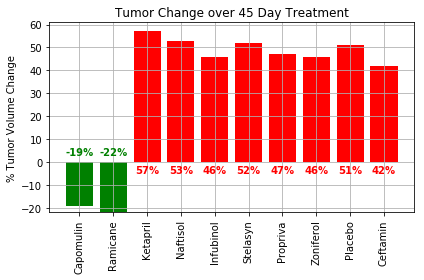

In [45]:
# Store all Relevant Percent Changes into a Tuple
tumor_shrink=tuple(tumor_comps)
        
# Splice the data between passing and failing drugs. Enumerate & Sweep the tuple - apply logic, append lists
successful_drugs = []
successful_amount = []
failed_drugs = []
failed_amount = []

for i, val in enumerate(tumor_shrink):
    if (val[1]) < 0 :
        successful_drugs.append(val[0])
        successful_amount.append(val[1])
    else :
        failed_drugs.append(val[0])
        failed_amount.append(val[1])
drug_list = successful_drugs + failed_drugs

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
x_range = np.arange(0,10)
x_success = np.arange(0,2)
x_failed = np.arange(2,10)

tick_locations = [value for value in x_range]
plt.xticks (tick_locations, drug_list, rotation=90)

#Plot Bar Charts
ax.bar(x_success, successful_amount, color='green', alpha=1, align="center")
ax.bar(x_failed, failed_amount, color='red', alpha=1, align="center")

#Set Titles
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(True)
fig.tight_layout()

# Use functions to label the percentages of changes
for i in range (len(x_success)):
    x=x_success[i]
    y=str(successful_amount[i])+'%'
    ax.text(x, 3, y, color='green', ha='center', fontweight='bold')
    
# Call functions to implement the function calls
for i in range (len(x_failed)):
    x=x_failed[i]
    y=str(failed_amount[i])+'%'
    ax.text(x, -5, y, color='red', ha='center', fontweight='bold')
    
# Save the Figure
plt.savefig('data/tumor_change.png')
# Show the Figure